Librerías cargadas exitosamente.

--- 1. ANÁLISIS ESTRUCTURAL ---
Número de Instancias (Filas): 150
Dimensiones (Columnas): 5

Primeras 5 filas del DataFrame cargado:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-nu

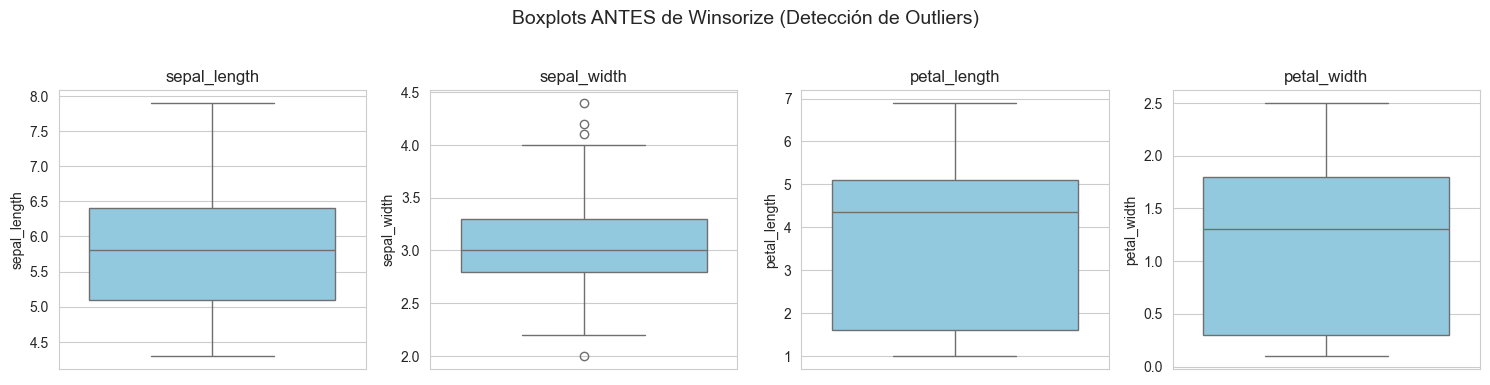


--- 3. ELIMINACIÓN DE OUTLIERS (WINSORIZE) ---
Outliers mitigados usando winsorize (5%-95% percentil).


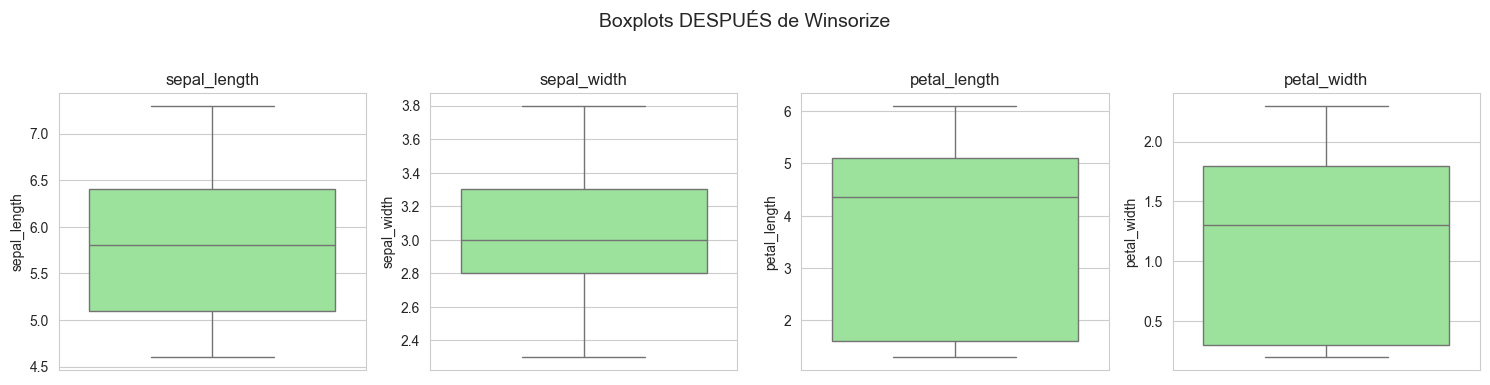


--- 4. CONVERSIÓN DE ATRIBUTOS CATEGÓRICOS ---
Clases originales y codificación:
'Iris-setosa' -> 0
'Iris-versicolor' -> 1
'Iris-virginica' -> 2

--- 5. NORMALIZACIÓN DEL DATASET (MINMAXSCALER) ---
Las características han sido normalizadas al rango [0, 1].

Primeras 5 filas del DataFrame Normalizado:
   sepal_length  sepal_width  petal_length  petal_width  species_encoded
0      0.185185     0.800000      0.020833          0.0                0
1      0.111111     0.466667      0.020833          0.0                0
2      0.037037     0.600000      0.000000          0.0                0
3      0.000000     0.533333      0.041667          0.0                0
4      0.148148     0.866667      0.020833          0.0                0

--- 6. VISUALIZACIÓN DE LA NORMALIZACIÓN ---


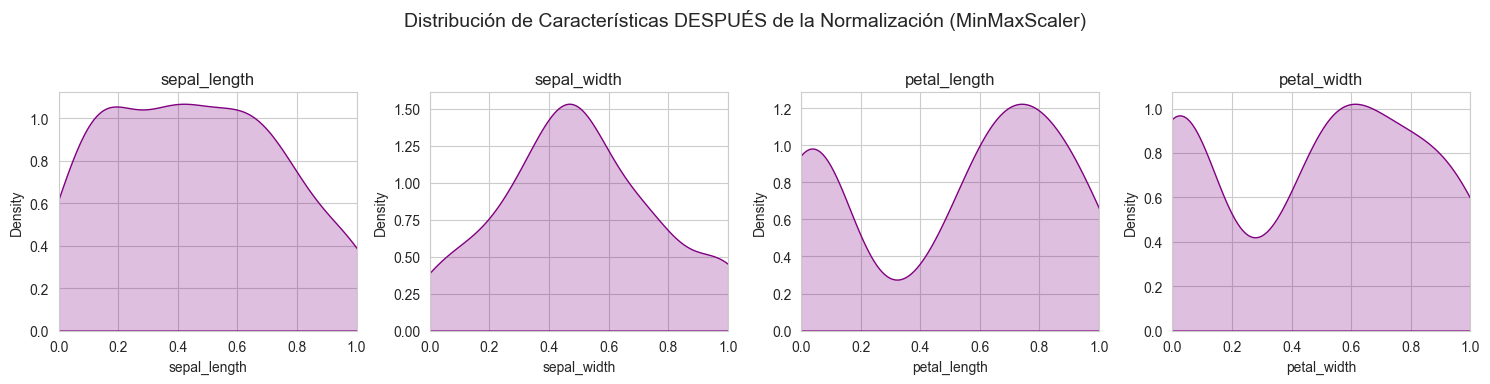

In [4]:
# ==============================================================================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Configuración para mejor visualización de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

print("Librerías cargadas exitosamente.")

--

# ¡Ajusta 'iris.csv' si tu archivo tiene otro nombre o ruta!
try:
    df = pd.read_csv('iris.csv')
except FileNotFoundError:
    print("Error: Asegúrate de que 'iris.csv' está en el mismo directorio.")
    # Si no lo encuentra, usa la carga de sklearn como fallback para que el código corra.
    from sklearn.datasets import load_iris
    iris_data = load_iris(as_frame=True)
    df = iris_data.frame
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    print("Cargando la versión de sklearn como alternativa para continuar.")

# Asumiendo que el CSV tiene las columnas estándar y 'species' es la última.
# Ajusta los nombres de las columnas si tu CSV los tiene diferentes.
if 'species' not in df.columns:
    # Intenta renombrar si el CSV no tiene encabezados o tiene nombres diferentes
    if df.shape[1] == 5:
        df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    else:
        print("Advertencia: El número de columnas no coincide con el Iris estándar (5). Revisa tu CSV.")

numeric_cols = df.columns[:-1] # Las primeras 4 columnas son numéricas

print("\n--- 1. ANÁLISIS ESTRUCTURAL ---")
print(f"Número de Instancias (Filas): {df.shape[0]}")
print(f"Dimensiones (Columnas): {df.shape[1]}")
print("\nPrimeras 5 filas del DataFrame cargado:")
print(df.head())
print("\nInformación del DataFrame:")
df.info()

# ------------------------------------------------------------------------------
# 3. DETECCIÓN Y VISUALIZACIÓN DE OUTLIERS
# ------------------------------------------------------------------------------

# EDA: Valores perdidos (Missings)
print("\n--- 2. VALORES PERDIDOS (MISSINGS) ---")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(f"Porcentaje de valores perdidos por columna:\n{missing_percent.round(2)}")
# Si hay missings > 10%, aquí se aplicaría la imputación. En Iris, se espera 0%.

# Gráficos de Caja (Boxplots) ANTES de eliminar Outliers
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
fig.suptitle('Boxplots ANTES de Winsorize (Detección de Outliers)', fontsize=14)
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# 

# ------------------------------------------------------------------------------
# 4. ELIMINACIÓN DE OUTLIERS (WINSORIZE)
# ------------------------------------------------------------------------------

print("\n--- 3. ELIMINACIÓN DE OUTLIERS (WINSORIZE) ---")
df_winsorized = df.copy()

# Aplicar winsorize (limitar al 5% y 95% percentil) a las columnas numéricas
for col in numeric_cols:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])

print("Outliers mitigados usando winsorize (5%-95% percentil).")

# Gráficos de Caja (Boxplots) DESPUÉS de eliminar Outliers
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
fig.suptitle('Boxplots DESPUÉS de Winsorize', fontsize=14)
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_winsorized[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(col)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# 

# ------------------------------------------------------------------------------
# 5. CONVERSIÓN DE ATRIBUTOS CATEGÓRICOS
# ------------------------------------------------------------------------------

print("\n--- 4. CONVERSIÓN DE ATRIBUTOS CATEGÓRICOS ---")
le = LabelEncoder()
# Aplicamos Label Encoding a la columna 'species' (variable objetivo)
df_winsorized['species_encoded'] = le.fit_transform(df_winsorized['species'])

print("Clases originales y codificación:")
for i, name in enumerate(le.classes_):
    print(f"'{name}' -> {i}")

# Eliminamos la columna de texto original
df_processed = df_winsorized.drop('species', axis=1)

# ------------------------------------------------------------------------------
# 6. NORMALIZACIÓN DEL DATASET
# ------------------------------------------------------------------------------

print("\n--- 5. NORMALIZACIÓN DEL DATASET (MINMAXSCALER) ---")
# Separar las características (X) y la variable objetivo (Y)
X = df_processed.drop('species_encoded', axis=1)
Y = df_processed['species_encoded']

# Inicializar y aplicar MinMaxScaler
scaler = MinMaxScaler()
X_normalized_array = scaler.fit_transform(X)

# Volver a crear el DataFrame con las características normalizadas
X_normalized = pd.DataFrame(X_normalized_array, columns=X.columns)

print("Las características han sido normalizadas al rango [0, 1].")
print("\nPrimeras 5 filas del DataFrame Normalizado:")
# Combinar características normalizadas y la variable objetivo codificada para el resultado final
df_final = pd.concat([X_normalized, Y], axis=1)
print(df_final.head())

# ------------------------------------------------------------------------------
# 7. VISUALIZACIÓN FINAL DE LA NORMALIZACIÓN
# ------------------------------------------------------------------------------

print("\n--- 6. VISUALIZACIÓN DE LA NORMALIZACIÓN ---")
# Gráficos de Densidad después de la Normalización
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
fig.suptitle('Distribución de Características DESPUÉS de la Normalización (MinMaxScaler)', fontsize=14)
for i, col in enumerate(X_normalized.columns):
    sns.kdeplot(X_normalized[col], ax=axes[i], fill=True, color='purple')
    axes[i].set_title(col)
    axes[i].set_xlim(0, 1) # Muestra el rango [0, 1] de la normalización
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
#